In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


## Nue - Energy

In [11]:
with open('../stv-analysis-new/nue_unsmeared_events_energy.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(10):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print(events)
print("")
#------------------------------------------------------------------------------
with open('../stv-analysis-new/nue_unsmeared_errors_energy.csv') as file:
    content = file.readlines()
errors = content[0:]
    
for i in range(10):
    errors[i]=errors[i].rstrip().rstrip(',')
    errors[i] = float(errors[i])
    
print(errors)

[37.9726, 63.1626, 44.8113, 36.1374, 37.5671, -56.1214, -50.6061, 110.1, 61.5177, 0.506936]

[3.4948, 26.8363, 48.1913, 23.9669, 18.995, 13.501, 7.10248, 5.9599, 4.18867, 0.719092]



Making ratio plot.
count,  [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
bins,  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Weights,  [37.9726, 63.1626, 44.8113, 36.1374, 37.5671, -56.1214, -50.6061, 110.1, 61.5177, 0.506936]



Text(0.5, 1.0, 'Unsmeared Plot - Nue Energy')

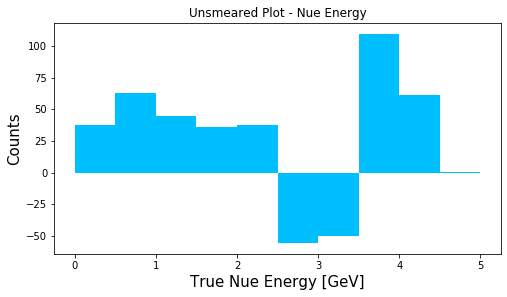

In [16]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
weights = []
for i in range(len(count)):
    weight = count[i]*events[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", events)
print("")

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=events)
ratio_ax1.set_ylabel('Counts', fontsize=15)
ratio_ax1.set_xlabel('True Nue Energy [GeV]', fontsize=15)
ratio_ax1.set_title("Unsmeared Plot - Nue Energy")

In [21]:
bincenters = np.arange(0.25, 5.25, 0.5)
bin_edges = np.arange(0, 5.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
n_tot = np.array(events)

ratio_ax1.bar(bincenters, np.array(errors)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(events)-np.array(errors)))
ratio_ax1.set_xlim([0, 5])

(0, 5)

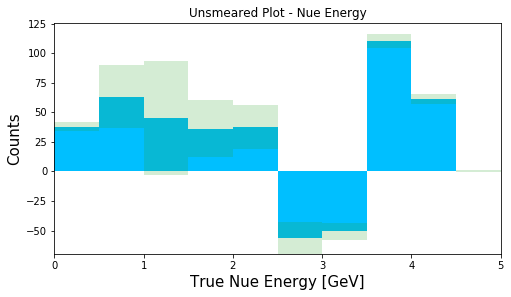

In [22]:
ratio_fig

In [23]:
print(sum(events))

285.04813600000006
